## Hysterese

In [2]:
%pylab inline
temperatur = [19, 18, 17, 16, 15, 14, 15, 16, 16.5, 17, 18, 18.9, 17.6, 16.3, 17.1, 17.4, 18.3, 17.4, 16.9, 
              16.8, 17.1, 17.3, 18.5, 19, 20]

# Funktion zum Testen der Filter
def test(filter):
    output = []
    for x in temperatur:
        y = filter(x)
        output.append(y)
        
    print (output)
    output[:] = [x * 4 + 15 for x in output] # für den Plot skalieren
    
    plot(range(0,len(temperatur)), temperatur, range(0, len(output)), output)

Populating the interactive namespace from numpy and matplotlib


[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


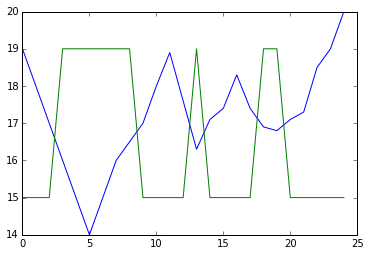

In [4]:
# Aufgabe: Programmieren Sie ein Filterfunktion heizung(temperatur), die eine Heizungssteuerung simulieren soll:
# Ausgabe der Funktion:
#       0 = Heizung aus
#       1 = Heizung an
# die Solltemperatur beträgt 17 Grad

heizungAn = 0

def filter(temperaturWert):
    global heizungAn
    if temperaturWert < 17:
        heizungAn = 1
    else:
        heizungAn = 0
    return heizungAn

test(filter)


[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


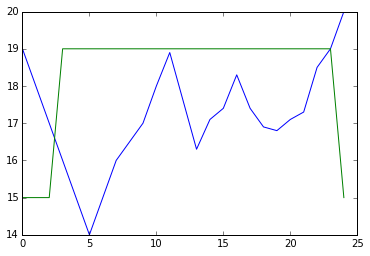

In [7]:
# verbesserte Heizungsschaltung mit Hysterese:
# wenn die Heizung an ist, wird sie beim Überschreiten von 19 Grad ausgeschaltet
# wenn die Heizung aus ist, wird sie beim Unterschreiten von 17 Grad eingeschaltet

def hysterese(temperaturWert):
    global heizungAn
    # Fall 1: die Heizung i st eingeschaltet
    if heizungAn == 1:                # Fall 1: die Heizung ist eingeschaltet
        if temperaturWert > 19:       #   --> beim Überschreiten von 19 Grad ausschalten
            heizungAn = 0      
    else:                             # Fall 2: die Heizung ist ausgeschaltet
        if temperaturWert < 17:       #   --> beim Unterschreiten von 17 Grad ausschalten
            heizungAn = 1
    return heizungAn
test(hysterese)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


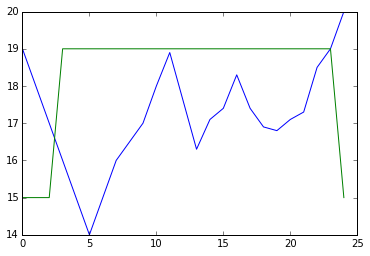

In [6]:
# alternative Version
heizungAn = 0
def hysterese2(temperaturWert):
    global heizungAn
    if temperaturWert < 17:
        heizungAn = 1
    if temperaturWert > 19:
        heizungAn = 0
    return heizungAn
test(hysterese2)